# Histograms, Binnings and Density

A simple histogram can be a great first step in understanding a dataset. Let's see an example:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

With the boiler-plate imports out of the way, we can plot our histogram:

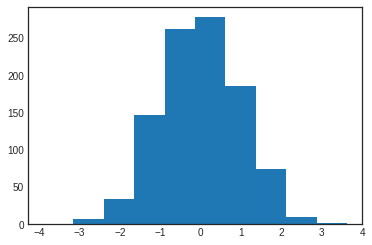

In [2]:
data = np.random.randn(1000)
plt.hist(data);

The `plt.hist()` function has many options to tune both the calculation and the display. Here's an example of a more customized histogram:

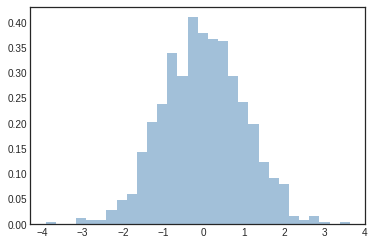

In [3]:
plt.hist(data, bins=30, alpha=0.5, density=True, histtype='stepfilled', color='steelblue');

The `plt.hist` docstring (as well as the web documentation) has more information on other customization options available. This combination of `histype='stepfilled'` along with some transparency `alpha` is very useful when comparing histograms of several distributions:

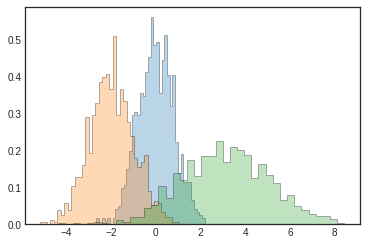

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', edgecolor='k', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If the goal is to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the `np.histogram()` function is available:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
counts

array([  8, 181, 540, 259,  12])

## Two-dimensional histogram

Just as we crate histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We'll take a look at some ways to go about this here.

Let's start by defining some data drawn from a multivariate Gaussian distribution:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### `plt.hist2d`:  Two-dimensional histogram

One way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function:

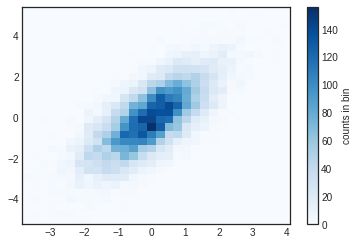

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with `plt.hist`, `plt.hist2d` has a nubmer of extra options to fine-tune the plot and the binning. Moreover, just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`, which can be used as follows:

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in higher dimensions, see the `np.histogramdd` function.

### `plt.hexbin`: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes. Another common shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the `plt.hexbin` routine, which will represent a two-dimensional dataset binned within a grid of hexagons:

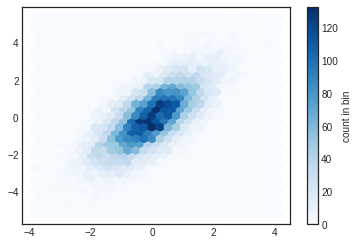

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc).

### Kernel Density Estimation

Another common method of evaluating densities in multiple dimensions is _Kernel Density Estimation_ (KDE). Put simply, KDE can be thought of a way to "smear out" the points in space and add up the result to obtain a smooth function. One quick and simple KDE implementation exists in the `scipy.stats` package. Let's take a look at a quick example:

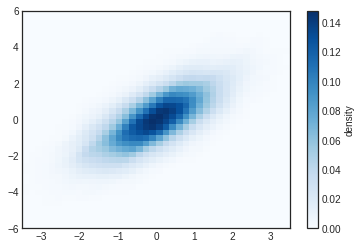

In [10]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

KDE has a smoothing length that effectively slided the knob between detail and smoothness (one example of ubiquitous bias-variance trade-off). The literature on choosing an appropriate smoothing length is vast: `gaussian_kde` uses a rule-of-thumb to attempt to find a nearly optimal smoothing length for the input data.